In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn import linear_model

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [2]:
print(check_output(["ls","./input/"]).decode("utf8"))

gender_submission.csv
test.csv
train.csv



# Reading data
    Reading training and test data from the file system.

In [3]:
train_df=pd.read_csv('./input/train.csv')
test_df=pd.read_csv('./input/test.csv')
combine_df=[train_df,test_df]

In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Variable Types
1. Categorical
  1. Name
  2. Sex
  3. Ticket
  4. Cabin
  5. Embarked
1. Numerical
  1. Pclass
  2. Age
  3. Fare
  4. SibSp
  

In [6]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


 Head and tail of the data shows that some of the values are missing in some fields. Cabin and Age contains **Nan** as values.

In [7]:
train_df.info()
print("*.----.*")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
*.----.*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-n

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. In training data consisit of 891 persons data which is less than 50% of actual passenger number
2. In training data survival rate is 38.38%, Avg. age is 30 

In [9]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Celotti, Mr. Francesco",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [10]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


    This clearly shows that first class passanger have more chance to survived that other class.

In [11]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


        Female have 4 times more survival rate than the male persons.

In [12]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


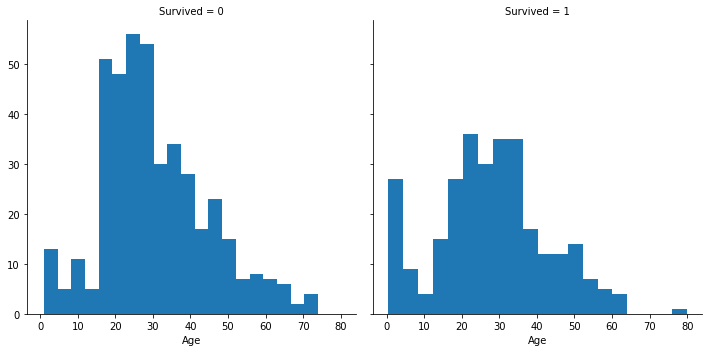

In [14]:
g=sns.FacetGrid(train_df,col='Survived',size=5)
g.map(plt.hist,'Age',bins=20)
plt.show()

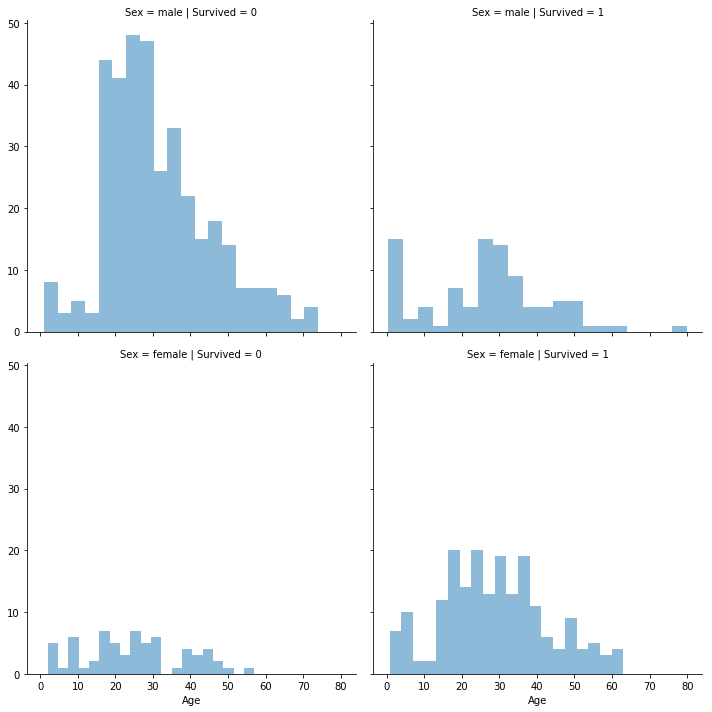

In [15]:
g=sns.FacetGrid(train_df,col='Survived',row='Sex',size=5)
g.map(plt.hist,'Age',alpha=0.5,bins=20)
plt.show()

# Machine Learning
    making the machine learning model 
 

In [16]:
print('New Data',train_df.shape,test_df.shape,combine_df[0].shape,combine_df[1].shape)
print(train_df.columns.values)

New Data (891, 12) (418, 11) (891, 12) (418, 11)
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [17]:
#After dropping the Ticket and Cabin 
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine_df=[train_df,test_df]
print(train_df.shape,test_df.shape,combine_df[0].shape,combine_df[1].shape)

(891, 10) (418, 9) (891, 10) (418, 9)


In [18]:
#adding the New column as Title
for dataset in combine_df:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
pd.crosstab(train_df['Sex'],train_df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [21]:
for dataset in combine_df:
    dataset['Title']=dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Lady', 
                                               'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title','Survived']].groupby('Title').mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [22]:
title_mapping={"Mr": 1, "Mrs": 3, "Miss":2, "Master":4, "Rare":5}
for dataset in combine_df:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [23]:
train_df = train_df.drop(['Name', 'PassengerId', 'Embarked', 'SibSp', 'Parch'], axis=1)
test_df = test_df.drop(['Name', 'Embarked', 'SibSp', 'Parch'], axis=1)
combine_df = [train_df, test_df]
train_df.shape, test_df.shape

((891, 6), (418, 6))

In [24]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Title
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,3
2,1,3,female,26.0,7.9250,2
3,1,1,female,35.0,53.1000,3
4,0,3,male,35.0,8.0500,1


In [25]:
for dataset in combine_df:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Title
0,0,3,0,22.0,7.2500,1
1,1,1,1,38.0,71.2833,3
2,1,3,1,26.0,7.9250,2
3,1,1,1,35.0,53.1000,3
4,0,3,0,35.0,8.0500,1


In [26]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Title
0,892,3,0,34.5,7.8292,1
1,893,3,1,47.0,7.0000,3
2,894,2,0,62.0,9.6875,1
3,895,3,0,27.0,8.6625,1
4,896,3,1,22.0,12.2875,3


In [27]:
train_df.dropna()
train_df['Fare'].fillna(train_df['Fare'].dropna().median(), inplace=True)
train_df['Age'].fillna(train_df['Age'].dropna().median(), inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Title
0,0,3,0,22.0,7.2500,1
1,1,1,1,38.0,71.2833,3
2,1,3,1,26.0,7.9250,2
3,1,1,1,35.0,53.1000,3
4,0,3,0,35.0,8.0500,1


In [28]:
test_df.dropna()
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Title
0,892,3,0,34.5,7.8292,1
1,893,3,1,47.0,7.0000,3
2,894,2,0,62.0,9.6875,1
3,895,3,0,27.0,8.6625,1
4,896,3,1,22.0,12.2875,3


# Modeling 


In [29]:
X_train=train_df.drop("Survived", axis=1)

In [30]:
X_train.head()

,Pclass,Sex,Age,Fare,Title
0,3,0,22.0,7.2500,1
1,1,1,38.0,71.2833,3
2,3,1,26.0,7.9250,2
3,1,1,35.0,53.1000,3
4,3,0,35.0,8.0500,1


In [31]:
Y_train=train_df["Survived"]

In [32]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
X_test=test_df.drop("PassengerId", axis=1)
X_test.head()
#X_test.shape

,Pclass,Sex,Age,Fare,Title
0,3,0,34.5,7.8292,1
1,3,1,47.0,7.0000,3
2,2,0,62.0,9.6875,1
3,3,0,27.0,8.6625,1
4,3,1,22.0,12.2875,3


In [34]:
X_train.shape,Y_train.shape,X_test.shape

((891, 5), (891,), (418, 5))

In [39]:
#Logistic Regression
logreg=linear_model.LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(acc_log)
print(Y_pred)

79.57
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


# New Model


In [38]:
logregCV=linear_model.LogisticRegressionCV()
logregCV.fit(X_train,Y_train)
Y_pred=logregCV.predict(X_test)
acc_log=round(logregCV.score(X_train,Y_train)*100,2)
acc_log

79.569999999999993